# Example of custom training in TF2

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build training data

In [2]:
n = 100
TRUE_W = 3.0
TRUE_b = 2.0

# random samples from normal distribution
np.random.seed(1)
r = np.random.normal(loc=0, scale=0.5, size=n)

# build data
inputs = np.random.normal(loc=0, scale=0.5, size=n)
outputs = TRUE_W * inputs + TRUE_b + r

# Define model

In [3]:
class Model(object):
    def __init__(self):
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

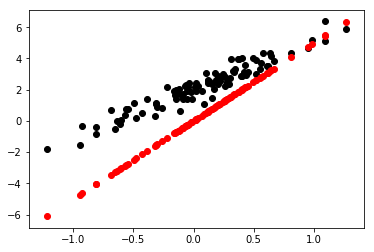

In [4]:
def plot_model(pred):
    plt.scatter(inputs, outputs, c='black')
    plt.scatter(inputs, pred, c='r')
    plt.show()
    
predictions = model(inputs)
plot_model(predictions)

In [5]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Train model

In [6]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=4.51472
Epoch  1: W=4.95 b=0.38, loss=3.21362
Epoch  2: W=4.89 b=0.68, loss=2.36170
Epoch  3: W=4.83 b=0.92, loss=1.79806
Epoch  4: W=4.77 b=1.11, loss=1.41996
Epoch  5: W=4.71 b=1.27, loss=1.16175
Epoch  6: W=4.65 b=1.40, loss=0.98142
Epoch  7: W=4.59 b=1.50, loss=0.85207
Epoch  8: W=4.53 b=1.58, loss=0.75644
Epoch  9: W=4.47 b=1.65, loss=0.68343


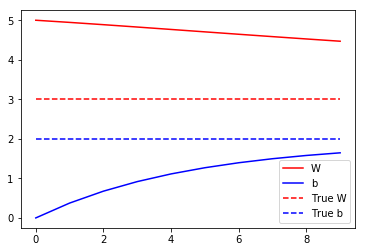

In [7]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()